In [104]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# 1. Load data and perform exploratory data analysis

In [12]:
df = pd.read_csv('Biosci_sector_data.csv', encoding = 'latin-1')
df.head()

,Company_ID,Business_ID,Business_Name,Group_Name,Incorporation_Year,CRN,DUNS_No,Time_Series_Year,Principal_Sector_Code,Principal_Sector_Description,...,LAD_Description,Postcode_Latitude,Postcode_Longitude,SME_Indicator,Employees_In_Scope_Band,Employees_In_Scope_Band_Desc,Turnover_In_Scope_Deflated_2022_Band,Turnover_In_Scope_Deflated_2022_Band_Desc,Primary_2007_UK_SIC_Code,Primary_2007_UK_SIC_Code_Description
0,BIS/22/01/U00100002,bid_06533078,GET MORE TIME LIMITED,NaN,2008.0,6533078,211122588.0,2021/22,M,Medical Technology,...,Hartlepool,54.693860,-1.216580,SME,E1,0 to 4 Employees,T2,50K to 99K,73120.0,Media representation
1,BIS/22/01/U00100004,bid_04033944,ALTONAIDS MOBILITY LIMITED,NaN,2001.0,4033944,220313949.0,2021/22,M,Medical Technology,...,Gateshead,54.929318,-1.614186,SME,E2,5 to 9 Employees,T4,250K to 499K,47749.0,Retail sale of medical and orthopaedic goods (...
2,BIS/22/01/U00100005,bid_drive_devilbiss,DRIVE DEVILBISS HEALTHCARE LIMITED,Drive_DeVilbiss,2002.0,4301005,423793467.0,2021/22,M,Medical Technology,...,County Durham,54.861496,-1.817694,Not SME,E6,100 to 249 Employees,T7,5M+,46900.0,Non-specialised wholesale trade
3,BIS/22/01/U00100006,bid_acorn_mobility,ACORN MOBILITY SERVICES LTD.,Acorn_Mobility,1991.0,2593771,236031030.0,2021/22,M,Medical Technology,...,County Durham,54.863136,-1.826058,Not SME,E7,250+ Employees,T7,5M+,32990.0,Other manufacturing n.e.c.
4,BIS/22/01/U00100007,bid_00510610,BOLTON BROS. (SURGICAL SHOE MAKERS) LIMITED,NaN,1953.0,510610,213064884.0,2021/22,M,Medical Technology,...,Newcastle upon Tyne,54.962954,-1.631653,SME,E3,10 to 19 Employees,T6,1M to 5M,15200.0,Manufacture of footwear


In [14]:
df.shape

(7914, 41)

In [15]:
df.columns

Index(['Company_ID', 'Business_ID', 'Business_Name', 'Group_Name',
       'Incorporation_Year', 'CRN', 'DUNS_No', 'Time_Series_Year',
       'Principal_Sector_Code', 'Principal_Sector_Description', 'Sector_Code',
       'Sector_Description', 'Segment_Code', 'Segment_Description',
       'Sub_Segment_Code', 'Sub_Segment_Description',
       'Genomics_Top_Level_Code', 'Genomics_Second_Level_Code',
       'Business_Activity_Codes', 'RandD_Activity', 'Manufacturing_Activity',
       'Service_Supply_Activity', 'Sales_Distribution_Activity', 'Website',
       'Address1', 'Address2', 'Address3', 'Town', 'Postcode', 'Region',
       'LAD_Code', 'LAD_Description', 'Postcode_Latitude',
       'Postcode_Longitude', 'SME_Indicator', 'Employees_In_Scope_Band',
       'Employees_In_Scope_Band_Desc', 'Turnover_In_Scope_Deflated_2022_Band',
       'Turnover_In_Scope_Deflated_2022_Band_Desc', 'Primary_2007_UK_SIC_Code',
       'Primary_2007_UK_SIC_Code_Description'],
      dtype='object')

In [25]:
df.isna().sum()

Company_ID                                      0
Business_ID                                     0
Business_Name                                   0
Group_Name                                   6429
Incorporation_Year                              2
CRN                                             0
DUNS_No                                       116
Time_Series_Year                                0
Principal_Sector_Code                           0
Principal_Sector_Description                    0
Sector_Code                                     0
Sector_Description                              0
Segment_Code                                    0
Segment_Description                             0
Sub_Segment_Code                             5754
Sub_Segment_Description                      5757
Genomics_Top_Level_Code                      7765
Genomics_Second_Level_Code                   7768
Business_Activity_Codes                         0
RandD_Activity                               5310


# Data Cleaning and further EDA 

After exploring the data, I identified the columns of interest, next I will select these columns, clean the data to remove null values, and perform further exploratory data analysis on the columns to gain an understanding of the data 

In [39]:
# 
df = df.loc[:, ['Incorporation_Year',
                'Business_Name',
                'Principal_Sector_Code',
                'Principal_Sector_Description',
                'Turnover_In_Scope_Deflated_2022_Band',
                'Turnover_In_Scope_Deflated_2022_Band_Desc',
                'Region',
                'Employees_In_Scope_Band',
                'Employees_In_Scope_Band_Desc',
                'Primary_2007_UK_SIC_Code',
                'Primary_2007_UK_SIC_Code_Description']]

In [47]:

# Remove all rows with null values
df = df.dropna()

# Now 'df' contains only rows without any null values
df.isna().sum()


Incorporation_Year                           0
Business_Name                                0
Principal_Sector_Code                        0
Principal_Sector_Description                 0
Turnover_In_Scope_Deflated_2022_Band         0
Turnover_In_Scope_Deflated_2022_Band_Desc    0
Region                                       0
Employees_In_Scope_Band                      0
Employees_In_Scope_Band_Desc                 0
Primary_2007_UK_SIC_Code                     0
Primary_2007_UK_SIC_Code_Description         0
dtype: int64

Exploring columns and checking for unique values 

In [87]:
# Get code descriptions for principal sectors 
# Create a dictionary mapping codes to descriptions
code_to_description = dict(zip(df['Principal_Sector_Code'].unique(), df['Principal_Sector_Description'].unique()))

# Print the mapping
print(code_to_description)



{'M': 'Medical Technology', 'B': 'Biopharmaceuticals'}


In [88]:

# Getting code descriptions for turnover in scope 
# Create a dictionary mapping codes to descriptions
turnover_code_desc = dict(zip(df['Turnover_In_Scope_Deflated_2022_Band'], df['Turnover_In_Scope_Deflated_2022_Band_Desc'].unique()))

# Print the mapping
print(turnover_code_desc)



{'T2': '50K to 99K', 'T4': '250K to 499K', 'T7': '1M to 5M', 'T6': '500K to 999K', 'T3': '0 to 49K'}


In [89]:
# Create a dictionary mapping bands to descriptions
employee_band_desc = dict(zip(df['Employees_In_Scope_Band'].unique(), df['Employees_In_Scope_Band_Desc'].unique()))

# Print the mapping
print(employee_band_desc)

{'E1': '0 to 4 Employees', 'E2': '5 to 9 Employees', 'E6': '100 to 249 Employees', 'E7': '250+ Employees', 'E3': '10 to 19 Employees', 'E5': '50 to 99 Employees', 'E4': '20 to 49 Employees'}


In [91]:
# Create a dictionary mapping codes to descriptions
SIC_code_desc = dict(zip(df['Primary_2007_UK_SIC_Code'].unique(), df['Primary_2007_UK_SIC_Code_Description'].unique()))

# Print the mapping
print(SIC_code_desc)

df['Primary_2007_UK_SIC_Code'].nunique()



{73120.0: 'Media representation', 47749.0: 'Retail sale of medical and orthopaedic goods (other than hearing aids) n.e.c., in specialised stores', 46900.0: 'Non-specialised wholesale trade', 32990.0: 'Other manufacturing n.e.c.', 15200.0: 'Manufacture of footwear', 28220.0: 'Manufacture of lifting and handling equipment', 86900.0: 'Other human health activities', 43290.0: 'Other construction installation', 28990.0: 'Manufacture of other special-purpose machinery n.e.c.', 46180.0: 'Agents specialised in the sale of other particular products', 27900.0: 'Manufacture of other electrical equipment', 21200.0: 'Manufacture of pharmaceutical preparations', 20590.0: 'Manufacture of other chemical products n.e.c.', 72110.0: 'Research and experimental development on biotechnology', 72190.0: 'Other research and experimental development on natural sciences and engineering', 21100.0: 'Manufacture of basic pharmaceutical products', 71200.0: 'Technical testing and analysis', 46750.0: 'Wholesale of che

258

In [98]:
# Check df to see if additional data cleaning is needed 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 7900
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Incorporation_Year                         7228 non-null   float64
 1   Business_Name                              7228 non-null   object 
 2   Principal_Sector_Code                      7228 non-null   object 
 3   Principal_Sector_Description               7228 non-null   object 
 4   Turnover_In_Scope_Deflated_2022_Band       7228 non-null   object 
 5   Turnover_In_Scope_Deflated_2022_Band_Desc  7228 non-null   object 
 6   Region                                     7228 non-null   object 
 7   Employees_In_Scope_Band                    7228 non-null   object 
 8   Employees_In_Scope_Band_Desc               7228 non-null   object 
 9   Primary_2007_UK_SIC_Code                   7228 non-null   float64
 10  Primary_2007_UK_SIC_Code_Desc

,Incorporation_Year,Business_Name,Principal_Sector_Code,Principal_Sector_Description,Turnover_In_Scope_Deflated_2022_Band,Turnover_In_Scope_Deflated_2022_Band_Desc,Region,Employees_In_Scope_Band,Employees_In_Scope_Band_Desc,Primary_2007_UK_SIC_Code,Primary_2007_UK_SIC_Code_Description
0,2008.0,GET MORE TIME LIMITED,M,Medical Technology,T2,50K to 99K,North East,E1,0 to 4 Employees,73120.0,Media representation
1,2001.0,ALTONAIDS MOBILITY LIMITED,M,Medical Technology,T4,250K to 499K,North East,E2,5 to 9 Employees,47749.0,Retail sale of medical and orthopaedic goods (...
2,2002.0,DRIVE DEVILBISS HEALTHCARE LIMITED,M,Medical Technology,T7,5M+,North East,E6,100 to 249 Employees,46900.0,Non-specialised wholesale trade
3,1991.0,ACORN MOBILITY SERVICES LTD.,M,Medical Technology,T7,5M+,North East,E7,250+ Employees,32990.0,Other manufacturing n.e.c.
4,1953.0,BOLTON BROS. (SURGICAL SHOE MAKERS) LIMITED,M,Medical Technology,T6,1M to 5M,North East,E3,10 to 19 Employees,15200.0,Manufacture of footwear


# 3. Data analyisis and visualisation 

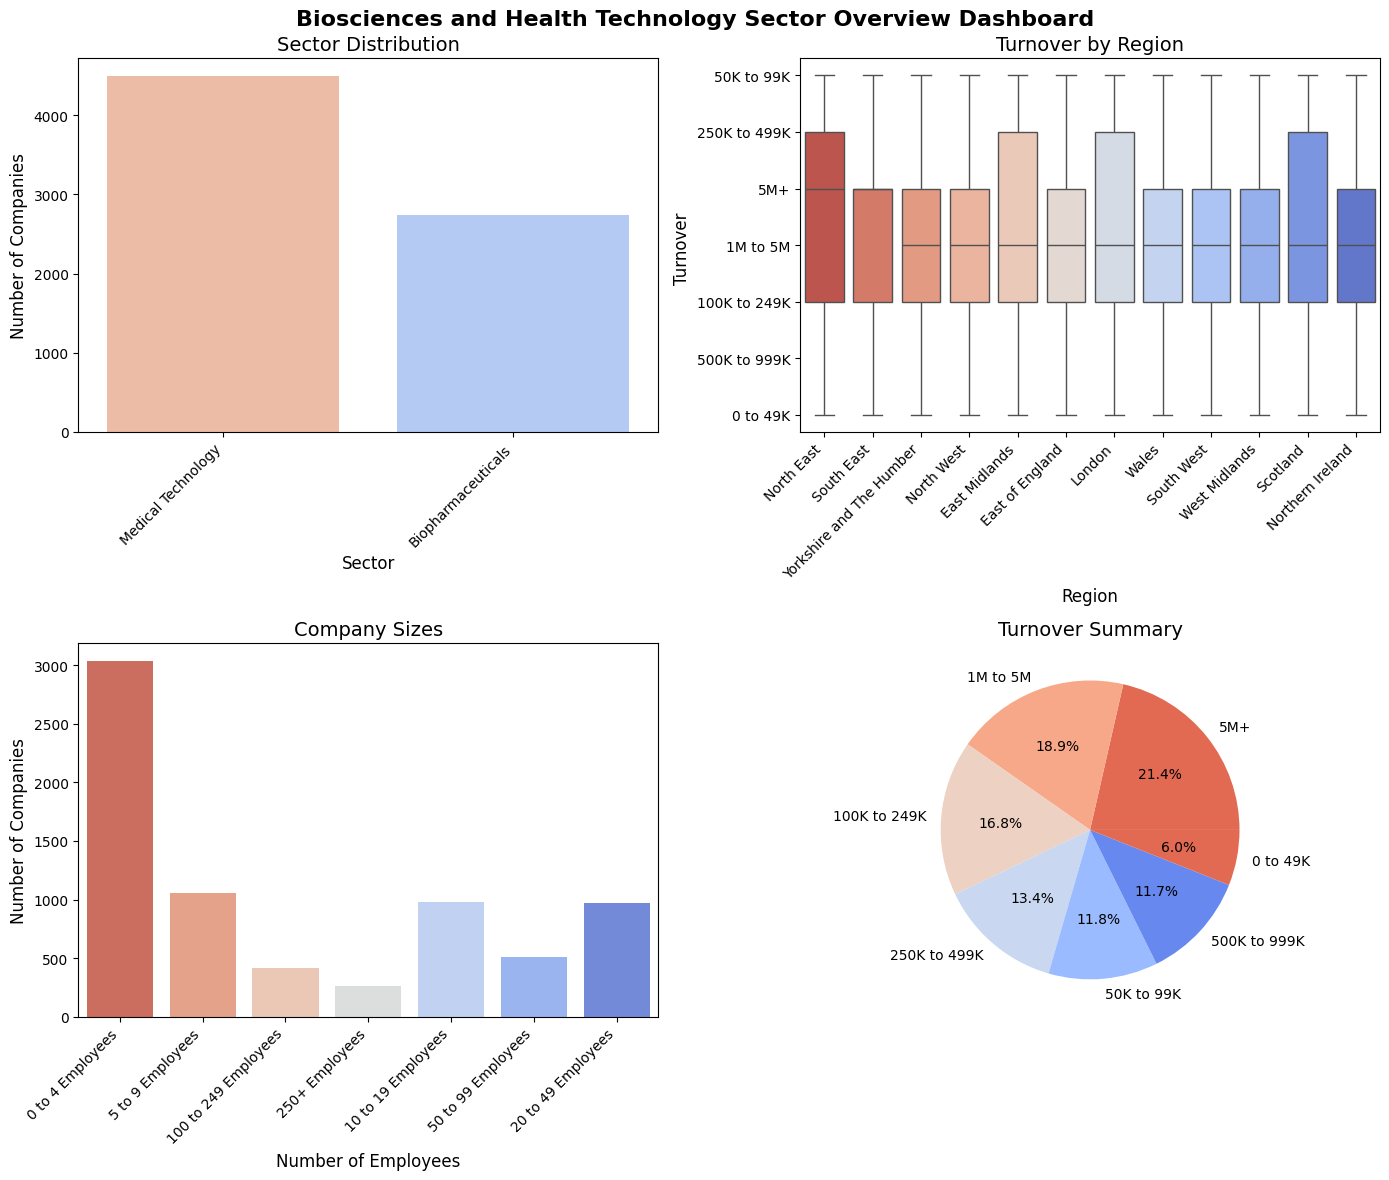

In [155]:
# Coding the dashboard 
def create_dashboard(df):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Biosciences and Health Technology Sector Overview Dashboard', fontsize=16, fontweight='bold')  # Title of the dashboard
    
    # Sector Distribution: Bar Chart
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='Principal_Sector_Description', palette='coolwarm_r')
    plt.title('Sector Distribution', fontsize=14)
    plt.xlabel('Sector', fontsize=12)
    plt.ylabel('Number of Companies', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    
    # Turnover analysis: Box Plot
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='Region', y='Turnover_In_Scope_Deflated_2022_Band_Desc', palette='coolwarm_r')
    plt.title('Turnover by Region', fontsize=14)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Turnover ', fontsize=12)
    plt.xticks(rotation=45, ha='right')  
    
    # Company size analysis: Bar Chart
    plt.subplot(2, 2, 3)
    sns.countplot(data=df, x='Employees_In_Scope_Band_Desc', palette='coolwarm_r')
    plt.title('Company Sizes', fontsize=14)
    plt.xlabel('Number of Employees', fontsize=12)
    plt.ylabel('Number of Companies', fontsize=12)
    plt.xticks(rotation=45, ha='right') 
    
    # Company turnover: Pie Chart
    plt.subplot(2, 2, 4)
    df['Turnover_In_Scope_Deflated_2022_Band_Desc'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('coolwarm_r'))
    plt.title('Turnover Summary', fontsize=14)
    plt.ylabel('')
    
    plt.tight_layout()
    plt.show()

# Display the dashboard
create_dashboard(df)

# 4. Export Data to Excel

The data can then be exported to excel for further analysis and manipulation 

In [154]:
df.to_excel(r'C:\Users\hanee\Documents\DataScience Content\Sales dashboard\biosci_sector.xlsx', index=True)  

In [149]:
pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.0 kB 653.6 kB/s eta 0:00:01
   ---------------------- ----------------- 143.4/250.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
